Training data shape: (4920, 134)
Test data shape: (42, 133)

=== Data Preprocessing ===
Missing values in training data:
0
Missing values in test data:
0

Training data columns: 133
Test data columns: 133
Number of diseases: 41

After dropping correlated features:
Training data shape: (4920, 130)
Test data shape: (42, 130)

Features: 129
Training samples: 4920
Test samples: 42
Number of classes: 41

=== Feature Selection ===
Selected 80 features using Mutual Information
Class weights calculated for 41 classes

=== Model Training and Evaluation ===

Training Random Forest...
Random Forest Accuracy: 1.0000
Classes with predictions in Random Forest:
  - (vertigo) Paroymsal  Positional Vertigo: Precision=1.000, Recall=1.000
  - AIDS: Precision=1.000, Recall=1.000
  - Acne: Precision=1.000, Recall=1.000
  - Alcoholic hepatitis: Precision=1.000, Recall=1.000
  - Allergy: Precision=1.000, Recall=1.000
  - Arthritis: Precision=1.000, Recall=1.000
  - Bronchial Asthma: Precision=1.000, Recall=1

C:\Users\mysel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mysel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mysel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Accuracy: 0.9762
Classes with predictions in Decision Tree:
  - (vertigo) Paroymsal  Positional Vertigo: Precision=1.000, Recall=1.000
  - AIDS: Precision=1.000, Recall=1.000
  - Acne: Precision=1.000, Recall=1.000
  - Alcoholic hepatitis: Precision=1.000, Recall=1.000
  - Allergy: Precision=1.000, Recall=1.000
  - Arthritis: Precision=1.000, Recall=1.000
  - Bronchial Asthma: Precision=1.000, Recall=1.000
  - Cervical spondylosis: Precision=1.000, Recall=1.000
  - Chicken pox: Precision=0.500, Recall=1.000
  - Chronic cholestasis: Precision=1.000, Recall=1.000
  - Common Cold: Precision=1.000, Recall=1.000
  - Dengue: Precision=1.000, Recall=1.000
  - Diabetes : Precision=1.000, Recall=1.000
  - Dimorphic hemmorhoids(piles): Precision=1.000, Recall=1.000
  - Drug Reaction: Precision=1.000, Recall=1.000
  - Fungal infection: Precision=1.000, Recall=0.500
  - GERD: Precision=1.000, Recall=1.000
  - Gastroenteritis: Precision=1.000, Recall=1.000
  - Heart attack: Precision=

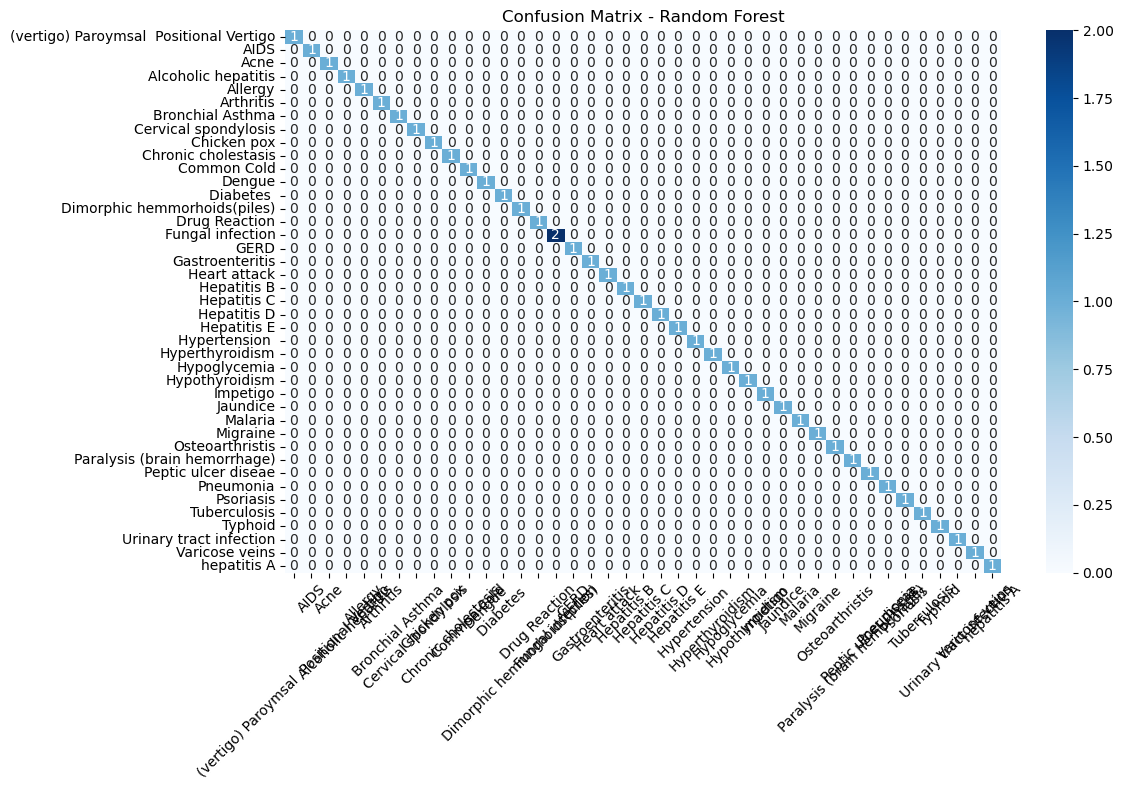


Top 10 Most Important Features (Random Forest):
                feature  importance
17           high_fever    0.039618
1             skin_rash    0.029909
0               itching    0.024330
24               nausea    0.023343
30            diarrhoea    0.022961
4            joint_pain    0.021863
7              vomiting    0.021488
62          muscle_pain    0.021397
8   burning_micturition    0.020727
10              fatigue    0.019278


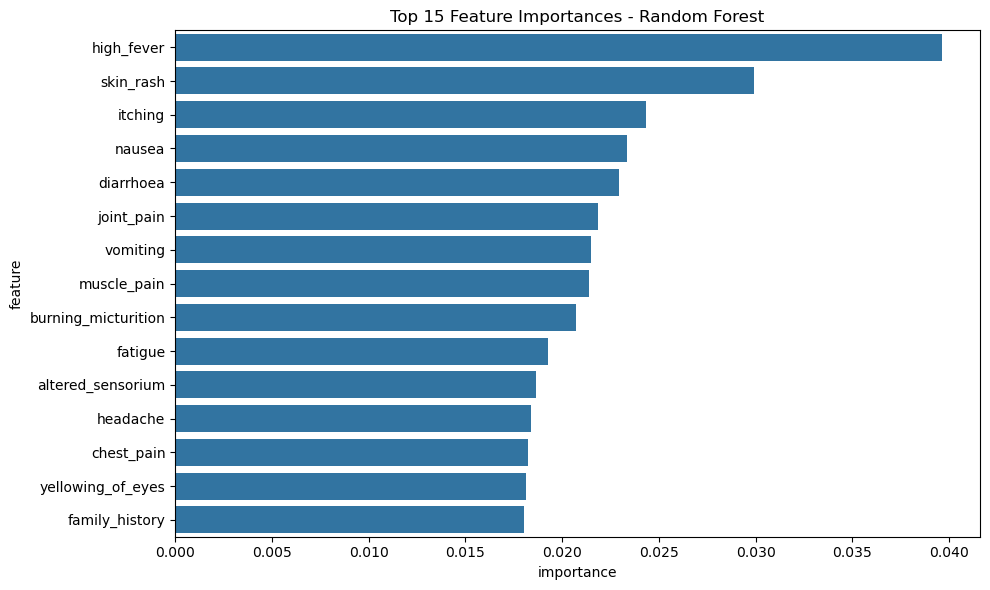


Performance by Disease Class (Best Model):
                                    Disease  Precision  Recall  F1-Score  \
0   (vertigo) Paroymsal  Positional Vertigo        1.0     1.0       1.0   
21                              Hepatitis D        1.0     1.0       1.0   
23                            Hypertension         1.0     1.0       1.0   
24                          Hyperthyroidism        1.0     1.0       1.0   
25                             Hypoglycemia        1.0     1.0       1.0   
26                           Hypothyroidism        1.0     1.0       1.0   
27                                 Impetigo        1.0     1.0       1.0   
28                                 Jaundice        1.0     1.0       1.0   
29                                  Malaria        1.0     1.0       1.0   
30                                 Migraine        1.0     1.0       1.0   

    Support  
0       1.0  
21      1.0  
23      1.0  
24      1.0  
25      1.0  
26      1.0  
27      1.0  
28     

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.utils.class_weight import compute_class_weight

# Load datasets
df_train = pd.read_csv(r"C:\Users\mysel\Downloads\archive\Training.csv")
df_test = pd.read_csv(r"C:\Users\mysel\Downloads\archive\Testing.csv")

print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)

# Data preprocessing
print("\n=== Data Preprocessing ===")

# Remove unnecessary column from training data
df_train = df_train.drop(columns=['Unnamed: 133'])

# Check for missing values
print("Missing values in training data:")
print(df_train.isnull().sum().sum())
print("Missing values in test data:")
print(df_test.isnull().sum().sum())

# Display basic info
print("\nTraining data columns:", df_train.shape[1])
print("Test data columns:", df_test.shape[1])
print("Number of diseases:", df_train['prognosis'].nunique())

# Remove highly correlated features (based on your previous analysis)
columns_to_drop = ['yellow_crust_ooze', 'red_sore_around_nose', 'blister']
df_train = df_train.drop(columns=columns_to_drop, errors='ignore')
df_test = df_test.drop(columns=columns_to_drop, errors='ignore')

print(f"\nAfter dropping correlated features:")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)

# Prepare features and targets
X_train = df_train.drop('prognosis', axis=1)
y_train = df_train['prognosis']
X_test = df_test.drop('prognosis', axis=1)
y_test = df_test['prognosis']

print(f"\nFeatures: {X_train.shape[1]}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"Number of classes: {len(le.classes_)}")

# Feature Selection - Using Mutual Information (better for this dataset)
print("\n=== Feature Selection ===")
k_features = min(80, X_train.shape[1])  # Use more features
selector = SelectKBest(mutual_info_classif, k=k_features)
X_train_selected = selector.fit_transform(X_train, y_train_encoded)
X_test_selected = selector.transform(X_test)

selected_features = X_train.columns[selector.get_support()]
print(f"Selected {len(selected_features)} features using Mutual Information")

# Calculate class weights for handling imbalance
class_weights = compute_class_weight(
    'balanced', 
    classes=np.unique(y_train_encoded), 
    y=y_train_encoded
)
class_weight_dict = dict(enumerate(class_weights))

print(f"Class weights calculated for {len(class_weights)} classes")

# Define models with class weights
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100, 
        class_weight=class_weight_dict, 
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(
        max_iter=1000, 
        class_weight='balanced', 
        random_state=42
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(
        class_weight=class_weight_dict, 
        random_state=42
    )
}

print("\n=== Model Training and Evaluation ===")

# Train and evaluate models
results = {}
detailed_reports = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train_selected, y_train_encoded)
    
    # Make predictions
    y_pred = model.predict(X_test_selected)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    results[name] = accuracy
    
    # Store detailed report
    report = classification_report(y_test_encoded, y_pred, target_names=le.classes_, output_dict=True)
    detailed_reports[name] = report
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Show top 5 predictions per class
    class_report = classification_report(y_test_encoded, y_pred, target_names=le.classes_, zero_division=0)
    print(f"Classes with predictions in {name}:")
    for i, class_name in enumerate(le.classes_):
        if report[class_name]['support'] > 0 and report[class_name]['precision'] > 0:
            print(f"  - {class_name}: Precision={report[class_name]['precision']:.3f}, Recall={report[class_name]['recall']:.3f}")

# Model comparison
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

print("\nAccuracy Scores:")
for name, accuracy in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {accuracy:.4f}")

# Best model analysis
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]

print(f"\nBest Model: {best_model_name} with accuracy {best_model_accuracy:.4f}")

# Detailed analysis of best model
print(f"\n=== Detailed Analysis for {best_model_name} ===")
best_report = detailed_reports[best_model_name]

# Calculate metrics for best model
y_pred_best = models[best_model_name].predict(X_test_selected)

print("Confusion Matrix (sample of first 10 classes):")
cm = confusion_matrix(y_test_encoded, y_pred_best)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature importance for tree-based models
if hasattr(models[best_model_name], 'feature_importances_'):
    print(f"\nTop 10 Most Important Features ({best_model_name}):")
    feature_importances = models[best_model_name].feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': selected_features,
        'importance': feature_importances
    }).sort_values('importance', ascending=False)
    
    print(feature_importance_df.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance_df.head(15), x='importance', y='feature')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.tight_layout()
    plt.show()

# Performance by disease class
print("\nPerformance by Disease Class (Best Model):")
performance_by_class = []
for class_name in le.classes_:
    if class_name in best_report:
        perf = best_report[class_name]
        performance_by_class.append({
            'Disease': class_name,
            'Precision': perf['precision'],
            'Recall': perf['recall'],
            'F1-Score': perf['f1-score'],
            'Support': perf['support']
        })

performance_df = pd.DataFrame(performance_by_class)
print(performance_df.sort_values('F1-Score', ascending=False).head(10))

# Additional: Try with all features to compare
print("\n" + "="*50)
print("COMPARISON: USING ALL FEATURES")
print("="*50)

# Train Random Forest with all features
rf_all_features = RandomForestClassifier(n_estimators=100, class_weight=class_weight_dict, random_state=42)
rf_all_features.fit(X_train, y_train_encoded)
y_pred_all = rf_all_features.predict(X_test)
accuracy_all = accuracy_score(y_test_encoded, y_pred_all)

print(f"Random Forest with ALL features: {accuracy_all:.4f}")
print(f"Random Forest with selected features: {results['Random Forest']:.4f}")
print(f"Difference: {accuracy_all - results['Random Forest']:.4f}")

# Final summary
print("\n" + "="*50)
print("FINAL SUMMARY")
print("="*50)
print(f"Best model: {best_model_name}")
print(f"Best accuracy: {best_model_accuracy:.4f}")
print(f"Number of features used: {X_train_selected.shape[1]}")
print(f"Number of diseases: {len(le.classes_)}")
print(f"Test set size: {X_test.shape[0]}")

# Check if we have good coverage
well_predicted_classes = sum(1 for class_name in le.classes_ 
                           if class_name in best_report and best_report[class_name]['precision'] > 0.5)
print(f"Diseases with good prediction (precision > 0.5): {well_predicted_classes}/{len(le.classes_)}")

print("\n✅ Project completed successfully!")

In [3]:
import joblib

# After model training
joblib.dump(models['Random Forest'], "model_rf.joblib")
joblib.dump(le, "label_encoder.joblib")
joblib.dump(list(selected_features), "selected_features.joblib")


['selected_features.joblib']